###Dataset Load

###Initial things

In [48]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:ylabel='Class'>

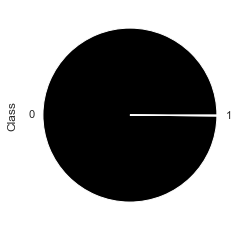

In [50]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [51]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [52]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

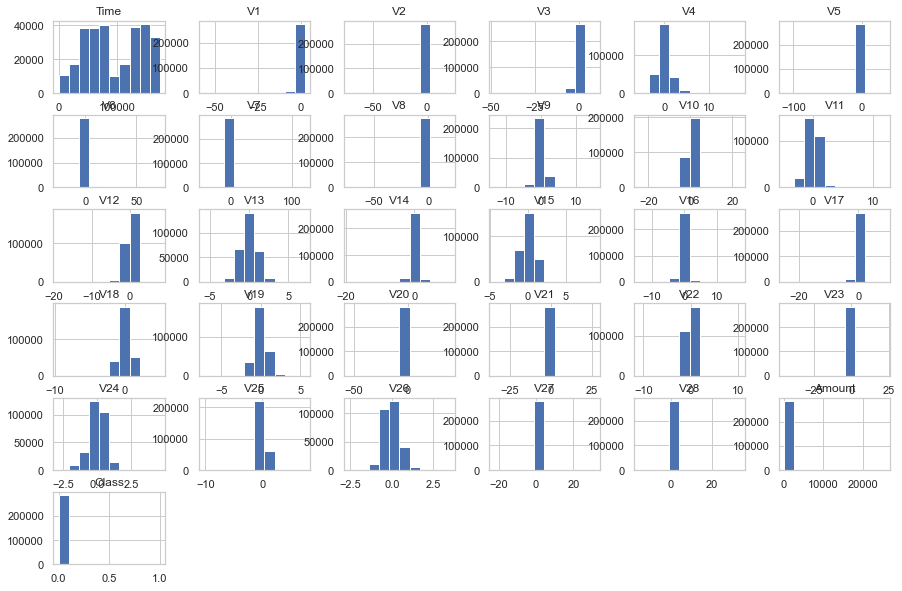

In [53]:
dataset.hist(figsize=(15, 10));

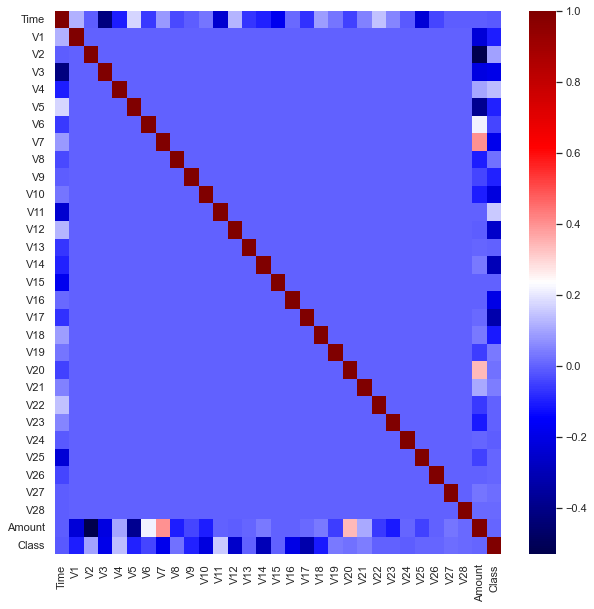

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [55]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [56]:
scores = []

In [57]:
#  "Support Vector Machine",
#names = ["Logistic Regression", "Random Forest", "XGBoost", "Ada Boost", "Stochastic Gradient Descent", "Neural Network Models (supervised)", 
#         "Decision Trees", "Gaussian Naive Bayes", "Gradient Boosting", "K-Nearest Neighbors", "Voting Classifier"]

names = ["RF", "XGBoost","KNN", "VC"]


In [58]:
preci = []
recall = []
f1 = []

###Random Forest

In [59]:
#!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE 
X = np.asarray(dataset.drop('Class', axis=1))
y = np.asarray(dataset['Class'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=30)
X_train.shape

(227845, 30)

In [61]:
sme = SMOTE(random_state=30)
X_train, y_train = sme.fit_resample(X_train, y_train)
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 227451, 1: 227451})


In [62]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [63]:

rf_clf = RandomForestClassifier(n_estimators=300)
#import time
#start_time = time.clock()
rf_clf.fit(X_train, y_train)
#print(time.clock() - start_time, "seconds")


y_test_pred = np.array(rf_clf.predict(X_test))

In [64]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9993328885923949


In [65]:
print(confusion_matrix(y_test, y_test_pred))

[[56850    14]
 [   24    74]]


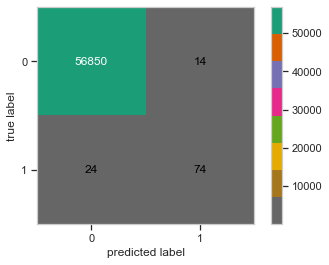

In [66]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [67]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Extreme Gradient Boosting (XGBoost)

In [69]:
xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False)
#import time
#start_time = time.clock()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')
#print(time.clock() - start_time, "seconds")


y_test_pred = xgb_clf.predict(X_test)

In [70]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.999403110845827


In [71]:
print(confusion_matrix(y_test, y_test_pred))

[[56851    13]
 [   21    77]]


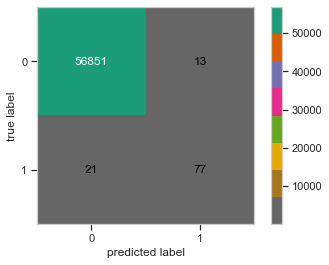

In [72]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [73]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.79      0.82        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [74]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### K-Nearest Neighbors(KNN)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [77]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
#import time
#start_time = time.clock()
knn_clf = knn_clf.fit(X_train_norm, y_train)
#print(time.clock() - start_time, "seconds")

In [78]:
y_test_pred = knn_clf.predict(X_test_norm)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9987886661282961


In [79]:
print(confusion_matrix(y_test, y_test_pred))

[[56816    48]
 [   21    77]]


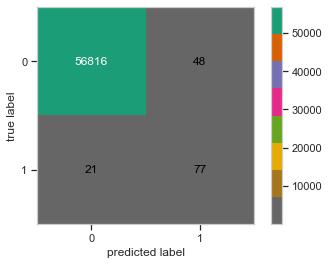

In [80]:
knn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=knn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [81]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.79      0.69        98

    accuracy                           1.00     56962
   macro avg       0.81      0.89      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [82]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Voting Classifier

In [83]:
from sklearn.ensemble import VotingClassifier

labels = ["Random Forest", "Xgboost", "K-Nearest Neighbors"]
from sklearn.ensemble import VotingClassifier

In [84]:
voting_clf = VotingClassifier (estimators = [('rf', rf_clf), ('xgb', xgb_clf), ('knn', knn_clf)],
voting='soft')
#import time
#start_time = time.clock()
voting_clf.fit(X_train,y_train)
#print(time.clock() - start_time, "seconds")

y_test_pred = voting_clf.predict(X_test)

[03:21:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.999420666409185


In [86]:
print(confusion_matrix(y_test, y_test_pred))

[[56852    12]
 [   21    77]]


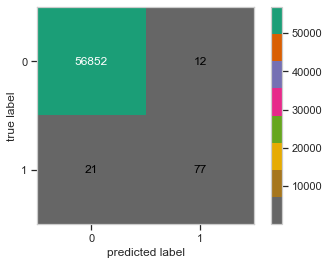

In [87]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.79      0.82        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [89]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

In [90]:
# scores = [round(x*100, 2)  for x in scores]
# preci = [round(x*100, 2)  for x in preci]
# recall = [round(x*100, 2)  for x in recall]
# f1 = [round(x*100, 2)  for x in f1]

In [91]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,RF,0.999333
1,XGBoost,0.999403
2,KNN,0.998789
3,VC,0.999421


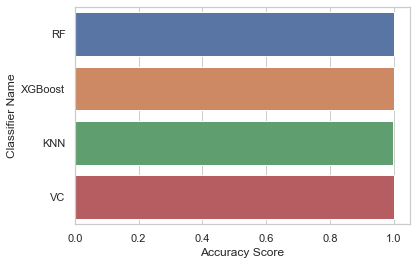

In [92]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

In [93]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [94]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,RF,0.9993328885923949,0.9202435527337943,0.8774279196765932,0.897682411775639
1,XGBoost,0.999403110845827,0.9275931526546943,0.8927428350349706,0.9094249991394778
2,KNN,0.9987886661282961,0.8078152611854954,0.8924350832060455,0.8449880524101389
3,VC,0.999420666409185,0.9323996477861081,0.8927516279443686,0.9116196343576952


In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.pyplot import figure

In [96]:
voting_probs = voting_clf.predict_proba(X_test)

In [97]:
voting_probs = voting_probs[:, 1]

In [98]:
voting_auc = roc_auc_score(y_test, voting_probs)


In [99]:
voting_auc

0.9747226285702801